In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [90]:
%matplotlib inline

In [91]:
bank = pd.read_csv('bank-full.csv',header=0,delimiter=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [92]:
bank_dummy=pd.get_dummies(bank)
bank1 = bank_dummy.drop(['y_no'],axis=1)
bank1

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,35,231,5,139,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,28,447,5,217,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,42,2,5,380,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,58,121,5,50,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9,43,593,5,55,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


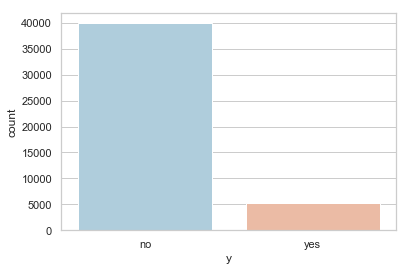

In [93]:
bank1=pd.DataFrame(bank1)
bank1['y_yes']
sns.set_style('whitegrid')
sns.countplot(x='y',data=bank,palette='RdBu_r')

In [94]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_divorced       45211 non-null uint8
marital_mar

In [95]:
#Logistic Regression

In [96]:
X_train, X_test, y_train, y_test = train_test_split(bank1.drop('y_yes',axis=1), 
                                                    bank1['y_yes'], test_size=0.30, 
                                                    random_state=101)

In [97]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


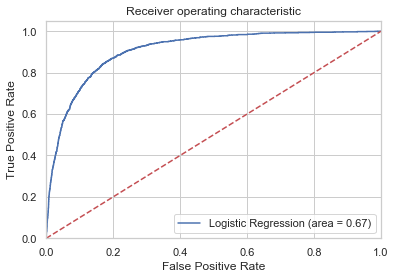

In [98]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.68      0.37      0.48      1597

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.80      0.67      0.71     13564
weighted avg       0.89      0.91      0.89     13564



In [100]:
Y_test=y_test
X_test=X_test
Y_train=y_train
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

accuracy_lr=accuracy_score(Y_test, model_lr.predict(X_test))
precision_lr=precision_score(Y_test, model_lr.predict(X_test))
recall_lr=recall_score(Y_test, model_lr.predict(X_test))
F1_score_lr=f1_score(Y_test, model_lr.predict(X_test))
class_report_lr=classification_report(Y_test, model_lr.predict(X_test))

tn2, fp2, fn2, tp2 = confusion_matrix(Y_test, model_lr.predict(X_test)).ravel()
print("True Negatives: ",tn2)
print("False Positives: ",fp2)
print("False Negatives: ",fn2)
print("True Positives: ",tp2)

Specificity2 = tn2/(tn2+fp2)
print("Specificity {:0.2f}".format(Specificity2))

print('Accuracy {:0.2f}:'.format(accuracy_lr))
print('Precision {:0.2f}:'.format(precision_lr))
print('Recall {:0.2f}:'.format(recall_lr))
print('F1 Score {:0.2f}:'.format(F1_score_lr))
print(class_report_lr)

C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


True Negatives:  11690
False Positives:  277
False Negatives:  1011
True Positives:  586
Specificity 0.98
Accuracy 0.91:
Precision 0.68:
Recall 0.37:
F1 Score 0.48:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.68      0.37      0.48      1597

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.80      0.67      0.71     13564
weighted avg       0.89      0.91      0.89     13564



In [101]:
#KNN

In [102]:
X_train, X_test, y_train, y_test = train_test_split(bank1.drop('y_yes',axis=1), 
                                                    bank1['y_yes'], test_size=0.30, 
                                                    random_state=101)

In [103]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


In [104]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

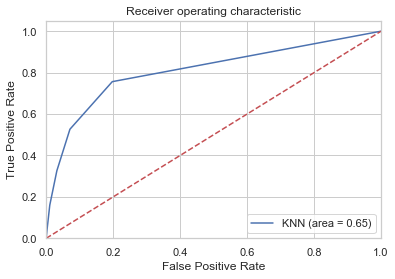

In [105]:
KNN_roc_auc = roc_auc_score(y_test, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, KNN.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [106]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11586   381]
 [ 1076   521]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11967
           1       0.58      0.33      0.42      1597

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.75      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564



In [107]:
error = []


for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

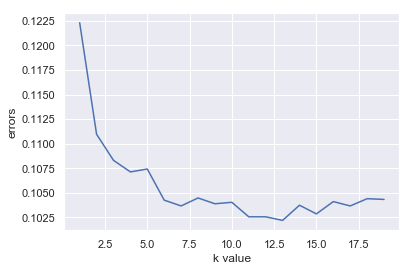

In [108]:
import seaborn as sns; sns.set()


# Create a dataframe for plotting

sdf = pd.DataFrame(
    {'k value': list(range(1,20)),
     'errors': error
    })


ax = sns.lineplot(x="k value", y="errors", data=sdf)

In [109]:
#Decision Tree

In [110]:
X_train, X_test, y_train, y_test = train_test_split(bank1.drop('y_yes',axis=1), 
                                                    bank1['y_yes'], test_size=0.30, 
                                                    random_state=101)

In [111]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

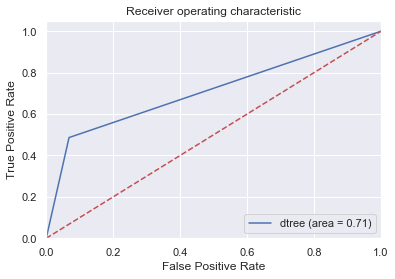

In [112]:
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='dtree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('dtree_ROC')
plt.show()

In [115]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,predictions))

[[11586   381]
 [ 1076   521]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11967
           1       0.49      0.49      0.49      1597

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.71      0.71      0.71     13564
weighted avg       0.88      0.88      0.88     13564



In [124]:
pd.options.display.width = 20000000
business_case = pd.read_csv('Thomas.Algenio-A6 Business Case.csv',header=0)
business_case

#Model of choice- Logistic Regression because it produces the lowest False positive Rate out of the three

,Confusion Matrix,Prediction/Outcome,Business Implications
0,TP,Model predicts customer will subscribe to term...,Bank has a term deposit that helps their capit...
1,TN,Model predicts customer will not subscribe to ...,No action is take so no implication
2,FP,Model predicts customer will subscribe but if/...,Bank loses money because manager made a phone ...
3,FN,Model predicts customer will not subscribe but...,No action is taken but this is an oppurtunity ...
4,NaN,NaN,NaN
5,Metric of Choice,False Positive Rate- By keeping this metric as...,NaN


In [125]:
"""
Confusion Matrix	Prediction/Outcome	Business Implications
TP	Model predicts customer will subscribe to term deposit and customer does subscribe 	Bank has a term deposit that helps their capital ratio
TN	Model predicts customer will not subscribe to term deposit and bank does not make phone call	No action is take so no implication
FP	Model predicts customer will subscribe but if/when called by bank customer declines	Bank loses money because manager made a phone call with no lead. Bank loses $17.50 for every FP assuming calls last 30 minutes and manger is paid 35/hr
FN	Model predicts customer will not subscribe but if customer was called the customer would have subscribed	No action is taken but this is an oppurtunity cost because the bank could have profited
		
Metric of Choice	False Positive Rate- By keeping this metric as low as possible the company avoids losing money and other negative implications such as waste of employee resource	

"""

'\nConfusion Matrix\tPrediction/Outcome\tBusiness Implications\nTP\tModel predicts customer will subscribe to term deposit and customer does subscribe \tBank has a term deposit that helps their capital ratio\nTN\tModel predicts customer will not subscribe to term deposit and bank does not make phone call\tNo action is take so no implication\nFP\tModel predicts customer will subscribe but if/when called by bank customer declines\tBank loses money because manager made a phone call with no lead. Bank loses $17.50 for every FP assuming calls last 30 minutes and manger is paid 35/hr\nFN\tModel predicts customer will not subscribe but if customer was called the customer would have subscribed\tNo action is taken but this is an oppurtunity cost because the bank could have profited\n\t\t\nMetric of Choice\tFalse Positive Rate- By keeping this metric as low as possible the company avoids losing money and other negative implications such as waste of employee resource\t\n\n'